# Training

In [1]:
from pathlib import Path
from dataclasses import dataclass
import sys

# Add the root project directory to the Python path
ROOT = Path.cwd().parent  # This will get the project root since the notebook is in 'notebooks/'
sys.path.append(str(ROOT))
from configs.path_config import EXTRACTED_DATA_DIR, WEIGHTS_DIR, FEATURES
from src.processing import dataset
from models import lstm_model
from src import utils

C:\Users\gwd007\Documents\Exjobb


#### Create the train data loader

In [ ]:
folder_path = EXTRACTED_DATA_DIR / 'group_alvbrodel_shifted'
data = dataset.StrainDataset(folder_path, FEATURES, sequence_length=128, start_idx=11112, test_size=0.5)
train_loader = data.train_dataloader

c:\Users\gwd007\Documents\Exjobb\src\processing\preprocessing.py:56: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method="bfill", inplace=True)
c:\Users\gwd007\Documents\Exjobb\src\processing\preprocessing.py:56: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method="bfill", inplace=True)
c:\Users\gwd007\Documents\Exjobb\src\processing\preprocessing.py:56: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method="bfill", inplace=True)
c:\Users\gwd007\Documents\Exjobb\src\processing\preprocessing.py:56: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method="bfill", inplace=True)


#### Train the model

In [3]:
# Model parameters
input_dim = data.feature_count
print(f"Input dimension: {input_dim}")
hidden_dim=32
num_layers=1
num_epochs=5
learning_rate=0.01
dropout = 0.3
# weight_decay = 0


# Location and name for saving the model
model_folder = WEIGHTS_DIR
# model_name = f'lstm_model_{input_dim}_{hidden_dim}_{num_layers}_{num_epochs}_{learning_rate}_{dropout}_{weight_decay}.pth'
model_name = f'lstm_model_{input_dim}_{hidden_dim}_{num_layers}_{num_epochs}_{learning_rate}_{dropout}.pth'

# Create the model and train it
model = lstm_model.LSTMModel(input_dim, hidden_dim, num_layers, dropout)
# losses, prediction = lstm_model.training_loop(model, train_loader, num_epochs, weight_decay, learning_rate, model_folder, model_name)
losses, prediction = lstm_model.training_loop(model, train_loader, num_epochs, learning_rate, model_folder, model_name)

Input dimension: 8


Epoch 1/5: 100%|██████████| 282/282 [00:01<00:00, 147.87batch/s]



Epoch 1/5, Average Loss: 0.010553



Epoch 2/5: 100%|██████████| 282/282 [00:01<00:00, 143.73batch/s]



Epoch 2/5, Average Loss: 0.002553



Epoch 3/5: 100%|██████████| 282/282 [00:03<00:00, 81.61batch/s]



Epoch 3/5, Average Loss: 0.001984



Epoch 4/5: 100%|██████████| 282/282 [00:05<00:00, 51.33batch/s]



Epoch 4/5, Average Loss: 0.001837



Epoch 5/5: 100%|██████████| 282/282 [00:06<00:00, 42.16batch/s]


Epoch 5/5, Average Loss: 0.001789



#### Plot the epoch losses

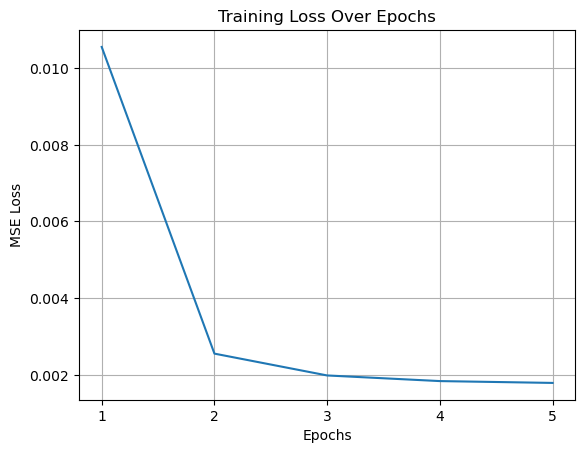

In [4]:
utils.plot_epochs_loss(num_epochs, losses)